# Ts/Tv ratio extraction from stats_bcftools files

### About Ts/Tv ratio

There are six types of base changes between ATCG. Transitions are defined as changes within Purine or within Pyrimidine. Transversions are defined as changes between Purine and Pyrimidine.

Two of them are transitions: A<->G and C<->T 

The other four types are transversions: A<->C, A<->T, G<->C, and G<->T 

If the changes were completely random, you would expect to see twice as many transversions – ts:tv=0.5. 

> For human-exome sequencing data, the Ti/Tv ratio is generally around 3.0, and about 2.0 outside of exome regions [(Bainbridge et al., 2011)](https://doi.org/10.1186/gb-2011-12-7-r68). 

Also, this number is correlated with GC content. In high-GC regions, the ts/tv ratio tends to be higher.

Reference:

https://bioinformatics.stackexchange.com/questions/4362/why-ti-tv-ratio

[Wang et al, Bioinformatics, 31 (3), 2015](https://doi.org/10.1093/bioinformatics/btu668)

### Ts/Tv ratio extraction

I found a written R function manipulating the stats_bcftools files and then modified a little  based on his code.

The original author: Per Unneberg

The link: https://github.com/percyfal/manticore/blob/develop/R/bcftools.R

In [78]:
source("bcftoolsstats.R")
data<-read.bcftools.stats("~/UKBiobank/vcf/ukb23156_c17_b4_v1.biallelic.filtered.stats_bcftools", label = NULL)
# c("ID", "SN", "TSTV", "SiS", "AF", "QUAL", "IDD", "ST", "DP","PSC", "PSI","HWE","label")
psc<-data$PSC
dim(psc)
head(psc)

[1] 200643     13

,id,sample,nRefHom,nNonRefHom,nHets,nTransitions,nTransversions,nIndels,average.depth,nSingletons,nHapRef,nHapAlt,nMissing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,0,1434748,13460,16,39,43,12,0,19.4,0,0,0,69
2,0,5523981,13522,15,47,49,13,0,25.0,0,0,0,0
3,0,5023838,13154,21,24,36,9,0,19.0,0,0,0,385
4,0,4023729,13510,15,41,42,14,0,21.1,0,0,0,18
5,0,4442146,13503,18,32,36,14,0,20.4,0,0,0,31
6,0,5654789,13506,25,25,37,13,0,20.3,0,0,0,28


In [79]:
read.bcftools.tstv<-function(stats_bcftools_file){
    data<-read.bcftools.stats(stats_bcftools_file, label = NULL)
    psc<-data$PSC
    pscm<-psc[,c(2,6,7)]
    pscm$sum<-rowSums(pscm)
    pscm$tstv<-pscm$nTransitions/pscm$nTransversions
    pscm
}
pscm2<-read.bcftools.tstv("~/UKBiobank/vcf/ukb23156_c3_b14_v1.biallelic.filtered.stats_bcftools")
write.csv(pscm2$sample,"~/UKBiobank/vcf/id.csv",row.names=FALSE)
head(pscm2)

,sample,nTransitions,nTransversions,sum,tstv
,<int>,<int>,<int>,<dbl>,<dbl>
1,1434748,14,3,1434765,4.666667
2,5523981,16,5,5524002,3.200000
3,5023838,16,3,5023857,5.333333
4,4023729,12,5,4023746,2.400000
5,4442146,23,8,4442177,2.875000
6,5654789,22,5,5654816,4.400000


### Some extra plots from the function

Producing 8 plots



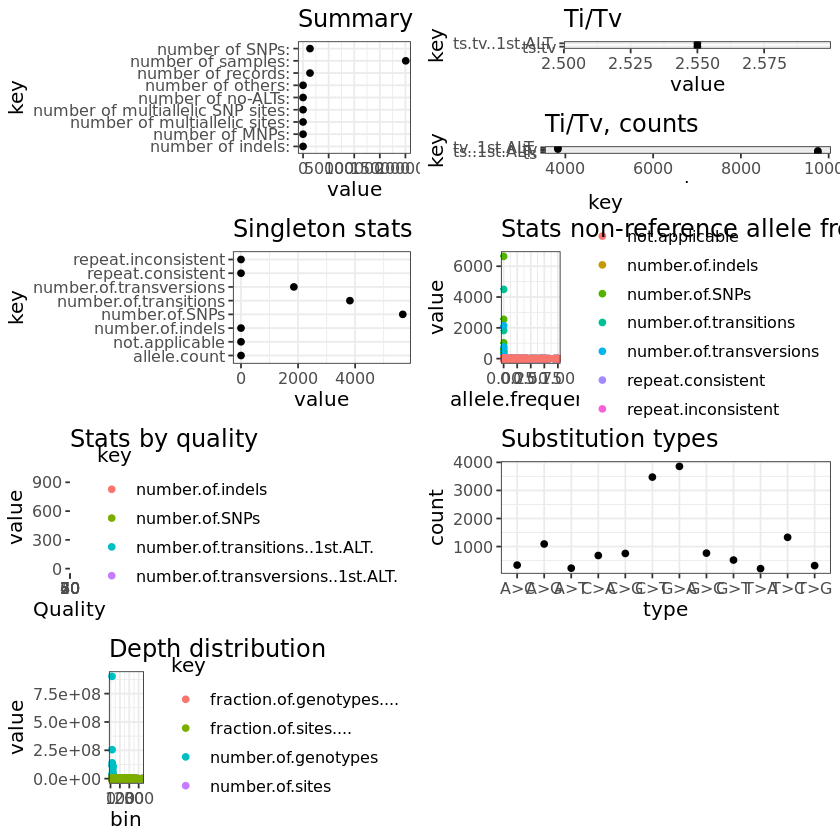

In [80]:
library(tidyr)
library(ggplot2)
library(gridExtra)
library(grid)
plot<-gplot.bcftools.stats(data)
grid.draw(plot)

### Analysis of the extracted TsTv data

In [2]:
library(data.table)
data<-fread("~/UKBiobank/vcf/ukb23156.biallelic.merged.tstv.csv")
class(data)<-'data.frame'

In [7]:
dim(data)

[1] 200643    952

In [28]:
head(data)

,c9_b9,c9_b8,c9_b7,c9_b6,c9_b5,c9_b41,c9_b40,c9_b4,c9_b39,c9_b38,⋯,c1_b17,c1_b16,c1_b15,c1_b14,c1_b13,c1_b12,c1_b11,c1_b10,c1_b1,c1_b0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.666667,2.777778,5.000000,1.928571,1.375000,4.333333,6.333333,1.684211,5.333333,2.625000,⋯,4.600000,3.000000,4.000000,2.190476,5.375000,2.333333,2.571429,2.666667,Inf,5.000000
2,5.600000,4.000000,6.000000,1.750000,3.200000,2.600000,3.555556,1.916667,6.375000,3.083333,⋯,3.625000,4.000000,3.625000,1.920000,5.625000,2.363636,2.727273,1.800000,Inf,3.625000
3,3.375000,3.166667,2.545455,2.000000,2.125000,2.500000,5.500000,1.500000,5.714286,1.933333,⋯,8.500000,2.888889,5.571429,2.866667,4.888889,2.590909,2.454545,2.400000,23,4.000000
4,3.428571,3.600000,3.100000,2.625000,1.800000,3.250000,4.375000,1.230769,4.888889,2.285714,⋯,9.250000,5.888889,5.285714,3.846154,5.444444,3.833333,3.272727,1.666667,10,5.500000
5,2.700000,3.125000,3.375000,1.769231,2.142857,3.000000,6.000000,1.600000,5.444444,3.090909,⋯,4.222222,3.571429,4.714286,3.500000,7.500000,2.636364,3.222222,1.600000,5,6.200000
6,4.714286,2.250000,3.875000,2.583333,1.500000,1.777778,4.500000,1.285714,5.444444,3.333333,⋯,6.333333,3.052632,4.714286,2.272727,5.400000,2.666667,4.000000,2.400000,Inf,4.666667


Evrey column is named after a chromosome block. Every row is a sample.

In [6]:
cat("Number of 0:",sum(data==0,na.rm=TRUE),"\n")
cat("Number of Inf and -Inf:",sum(is.infinite(as.matrix(data))),"\n")
cat("Number of NA:",sum(is.na(data)),"\n")

Number of 0: 23244 
Number of Inf and -Inf: 1349932 
Number of NA: 51340 


#### Confirmation of zeros

For example, zero values can be found in the sample 2. Find the exact chromosome blocker which produces the 0 and check in the original data.

In [40]:
datar2<-data[2,]
lis<-which(datar2==0) #626
datar2[1,626]

c15_b8
<dbl>
0


Show the original Ts and Tv values within block c15_b8. As we can see, number of Transitions in c15_b8 is 0 for sample 2. That will lead to 0 while calculating Ts/Tv.

In [41]:
c15b8<-read.bcftools.stats("~/UKBiobank/vcf/ukb23156_c15_b8_v1.biallelic.filtered.stats_bcftools", label = NULL)
psc<-c15b8$PSC
head(psc)

,id,sample,nRefHom,nNonRefHom,nHets,nTransitions,nTransversions,nIndels,average.depth,nSingletons,nHapRef,nHapAlt,nMissing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,0,1434748,12605,7,16,19,4,0,19.3,0,0,0,128
2,0,5523981,12744,1,2,0,3,0,22.3,0,0,0,9
3,0,5023838,12355,2,3,2,3,0,18.3,0,0,0,396
4,0,4023729,12701,1,9,7,3,0,20.9,0,0,0,45
5,0,4442146,12648,1,23,21,3,0,19.2,0,0,0,84
6,0,5654789,12684,2,18,16,4,0,20.3,0,0,0,52


#### Confirmation of inf

For example, Inf values can be found in the first sample. Find the exact chromosome blocker which produces the inf and check in the original data. It's hard to operate on inf value directly and I replace them with "A".

In [39]:
datar1<-data[1,]
#sum(is.infinite(as.matrix(datar1)))
datar1[is.infinite(as.matrix(datar1))]<-"A"
lis<-which(datar1=="A") #366,598,697,794,845,940,951
datar1[1,366]

c15_b8
<dbl>
0


Show the original Ts and Tv values within block c20_b11. As we can see, number of Transversions in c20_b11 is 0 for sample 1 as well as sample 5. That will lead to inf while calculating Ts/Tv.

In [36]:
c20b11<-read.bcftools.stats("~/UKBiobank/vcf/ukb23156_c20_b11_v1.biallelic.filtered.stats_bcftools", label = NULL)
psc<-c20b11$PSC
head(psc)

,id,sample,nRefHom,nNonRefHom,nHets,nTransitions,nTransversions,nIndels,average.depth,nSingletons,nHapRef,nHapAlt,nMissing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,0,1434748,12871,2,6,8,0,0,18.7,0,0,0,98
2,0,5523981,12961,5,2,6,1,0,23.4,0,0,0,9
3,0,5023838,12578,4,10,11,3,0,18.6,0,0,0,385
4,0,4023729,12925,1,4,4,1,0,19.5,0,0,0,47
5,0,4442146,12921,1,6,7,0,0,19.8,1,0,0,49
6,0,5654789,12899,1,14,14,1,0,19.6,0,0,0,63


#### Confirmation of NA

For example, Inf values can be found in the sample 10 and 25. Find the exact chromosome blocker which produces the NA and check in the original data.

In [63]:
datar10<-data[10,]
#sum(is.na(datar10)) #1
# which(is.na(datar10)) #468
datar10[1,468]

c19_b42
<dbl>
NA


In [51]:
c19b42<-read.bcftools.stats("~/UKBiobank/vcf/ukb23156_c19_b42_v1.biallelic.filtered.stats_bcftools", label = NULL)
psc<-c19b42$PSC
head(psc,10)

,id,sample,nRefHom,nNonRefHom,nHets,nTransitions,nTransversions,nIndels,average.depth,nSingletons,nHapRef,nHapAlt,nMissing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,0,1434748,13262,0,6,3,3,0,22.8,0,0,0,27
2,0,5523981,13293,0,2,2,0,0,30.5,0,0,0,0
3,0,5023838,12996,0,4,2,2,0,18.7,0,0,0,295
4,0,4023729,13263,0,2,2,0,0,25.3,0,0,0,30
5,0,4442146,13271,0,3,1,2,0,21.0,0,0,0,21
6,0,5654789,13255,0,16,10,6,0,24.4,0,0,0,24
7,0,4515669,13281,0,5,4,1,0,23.5,0,0,0,9
8,0,1129683,13214,0,1,1,0,0,19.6,0,0,0,80
9,0,5327043,13280,0,5,2,3,0,28.2,0,0,0,10


In [64]:
datar25<-data[25,]
# sum(is.na(datar25)) #2
which(is.na(datar25)) #169, 170
datar25[1,169]

[1] 169 170

c6_b11
<dbl>
NA


In [68]:
c6b11<-read.bcftools.stats("~/UKBiobank/vcf/ukb23156_c6_b11_v1.biallelic.filtered.stats_bcftools", label = NULL)
psc<-c6b11$PSC
psc[20:25,]

,id,sample,nRefHom,nNonRefHom,nHets,nTransitions,nTransversions,nIndels,average.depth,nSingletons,nHapRef,nHapAlt,nMissing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
20,0,3748499,10813,18,65,62,21,0,19.0,0,0,0,142
21,0,2204914,10900,0,53,42,11,0,20.7,0,0,0,85
22,0,1892597,10906,26,73,80,19,0,19.8,0,0,0,33
23,0,5009888,10918,15,37,36,16,0,19.2,0,0,0,68
24,0,3061244,10885,21,82,78,25,0,22.5,0,0,0,50
25,0,2845327,10872,0,0,0,0,0,17.3,0,0,0,166


As we can see, when the number of Transitions and Transversions are both 0. That will lead to NA while calculating Ts/Tv.

## Calculate the average median TsTv of all chromosomes within each sample

[1] 3.255787

png 
  2

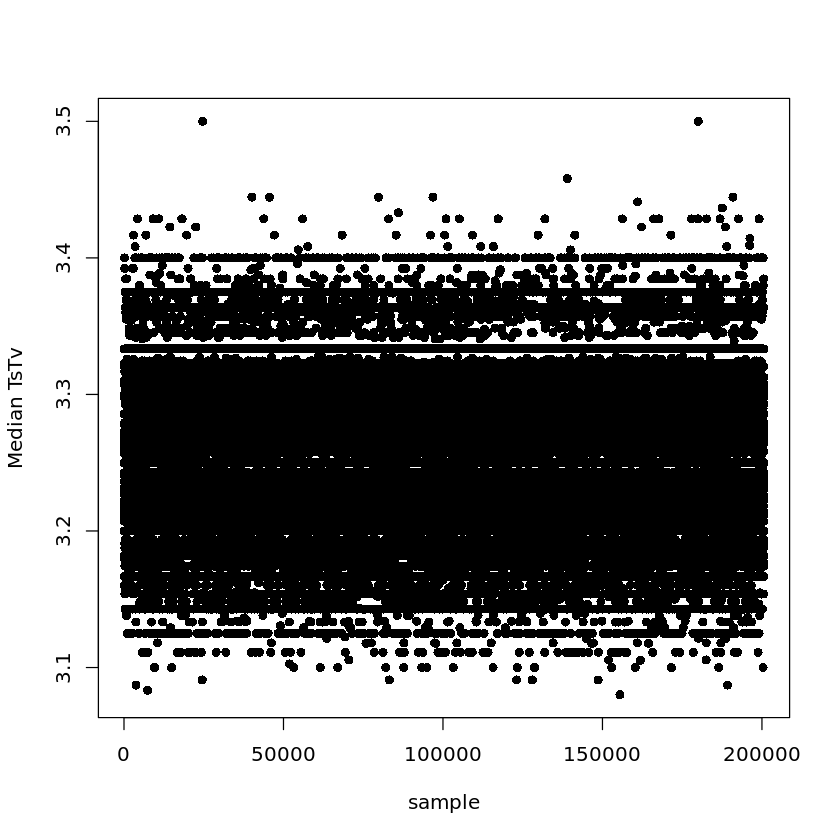

In [70]:
library("matrixStats")
datano<-data
datano[is.infinite(as.matrix(data))]<-NA
datano[data==0]<-NA
med<-rowMedians(as.matrix(datano),na.rm=TRUE)
mediantstv<-data.frame(sample=psc$sample,MedTsTv=med)
#sum(mediantstv==0)
#sum(is.infinite(as.matrix(mediantstv)))
#sum(is.na(mediantstv))
mean(mediantstv$MedTsTv)
plot(mediantstv$MedTsTv,pch=16,xlab="sample",ylab="Median TsTv")
png("ukb23156.biallelic.merged.ignored.median.tstv.scatter.png",width = 1000, height = 1000)
plot(mediantstv$MedTsTv,pch=16,xlab="sample",ylab="Median TsTv")
dev.off()

## Calculate the average mean TsTv of all chromosomes within each sample

[1] 3.817378

png 
  2

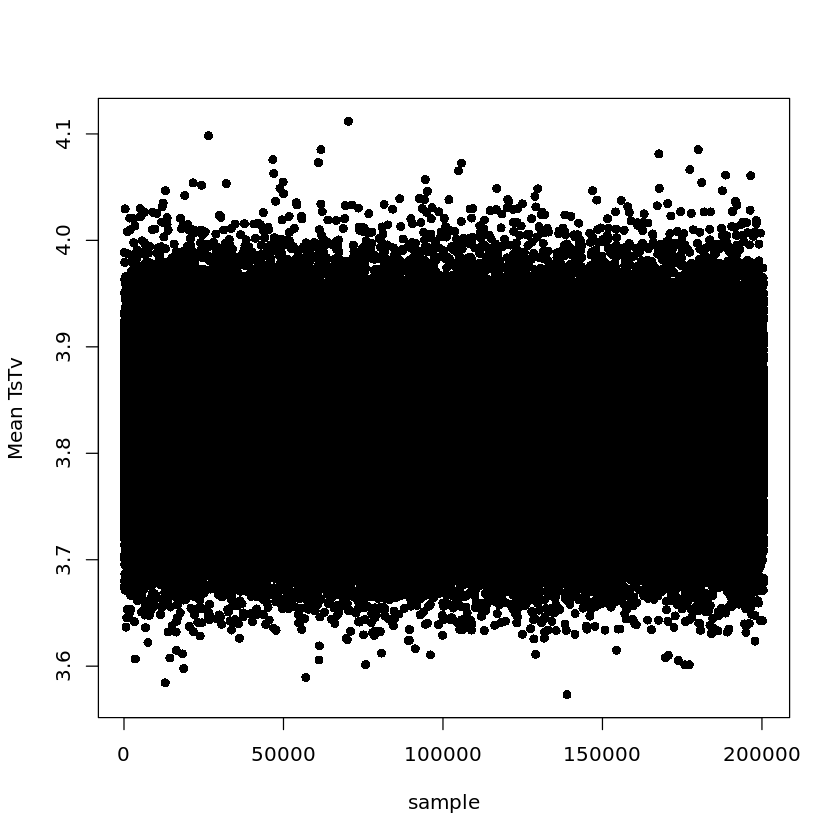

In [71]:
datano<-data
datano[is.infinite(as.matrix(data))]<-NA
datano[data==0]<-NA
ave<-rowMeans(datano,na.rm=TRUE)
Ave<-data.frame(sample=psc$sample,AveTsTv=ave)
#sum(Ave==0)
#sum(is.infinite(as.matrix(Ave)))
#sum(is.na(Ave))
#sum(Ave$AveTsTv<2.8)
mean(Ave$AveTsTv)
plot(Ave$AveTsTv,pch=16,xlab="sample",ylab="Mean TsTv")
png("ukb23156.biallelic.merged.ignored.mean.tstv.scatter.png",width = 1000, height = 1000)
plot(Ave$AveTsTv,pch=16,xlab="sample",ylab="Mean TsTv")
dev.off()

## Calculate the average TsTv of all samples within each chromosome

In [3]:
datano<-data
datano[is.infinite(as.matrix(data))]<-NA
datano[data==0]<-NA

In [21]:
nam<-as.data.frame(names(datano))
namsp<-c()
for(i in 1:nrow(nam)){
    namsp<-rbind(namsp,unlist(strsplit(nam[i,1],"_")))
}
nam<-cbind(nam,namsp)
colnames(nam)<-c("full","chr","block")

In [66]:
avetstv<-c()
for (i in 1:22){
    lis<-which(nam$chr==paste0("c",i))
    avetstv[i]<-mean(as.matrix(datano[,lis]),na.rm=TRUE)
}

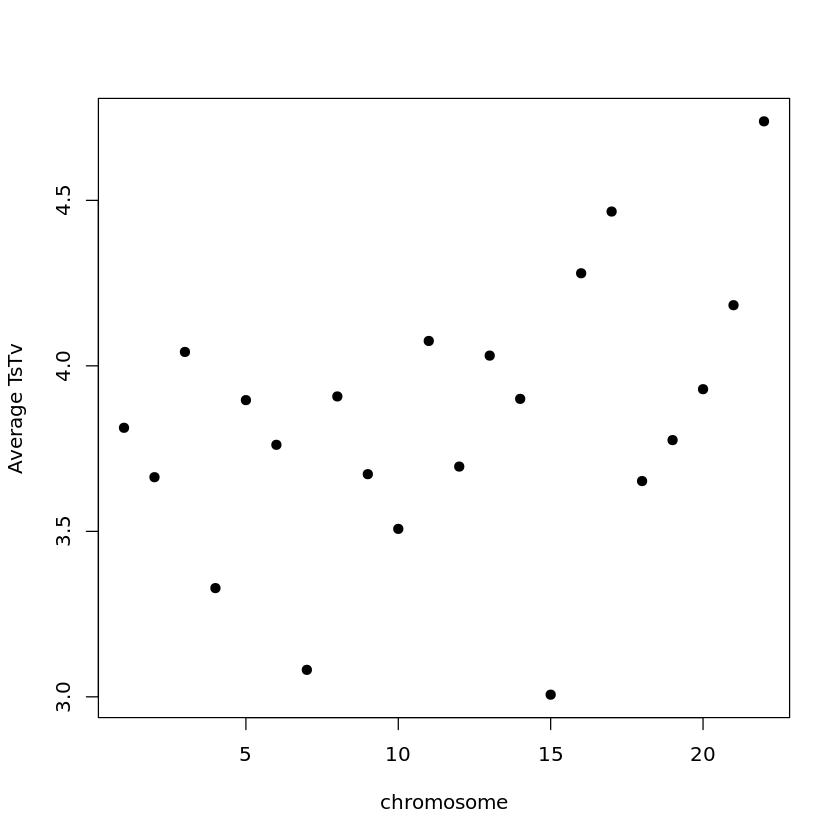

In [75]:
plot(avetstv,xlab="chromosome",ylab="Average TsTv",pch=19)

In [76]:
png("ukb23156.biallelic.merged.ignored.mean.tstv.scatter.withinchr.png",width = 1000, height = 1000)
plot(avetstv,xlab="chromosome",ylab="Average TsTv",pch=19)
dev.off()

png 
  2

In [77]:
data<-fread("~/UKBiobank/vcf/ukb23156.biallelic.merged.tstv.all1alt.csv")
class(data)<-'data.frame'

In [108]:
lis<-c()
for (i in 1:22){
    lis<-c(lis,paste0("\"","c",i,"\"",","))
}
cat(lis)

"c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10", "c11", "c12", "c13", "c14", "c15", "c16", "c17", "c18", "c19", "c20", "c21", "c22",

In [115]:
order<-c(
"c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10", "c11", "c12", "c13", "c14", "c15", "c16", "c17", "c18", "c19", "c20", "c21", "c22")
data$chr<-factor(data$chr,levels=order)

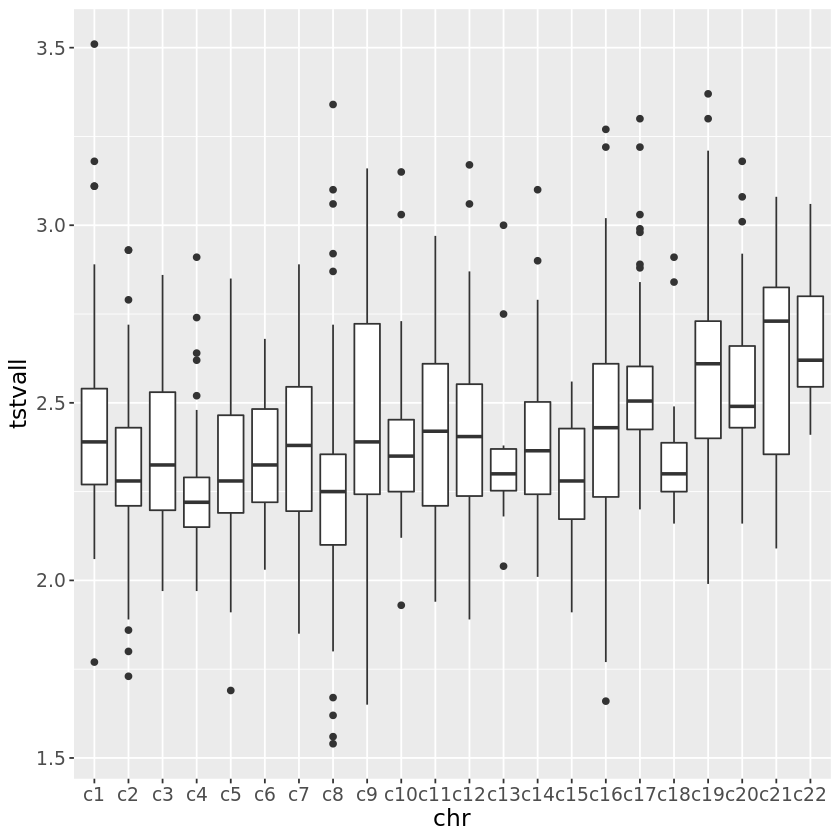

In [124]:
library(ggplot2)
p <- ggplot(data, aes(x=chr, y=tstvall)) +  
    geom_boxplot()+
    theme(text = element_text(size=14))
p


In [127]:
png("ukb23156.biallelic.merged.ignored.mean.tstv.boxplot.withinchr.png",width = 1000, height = 1000)
ggplot(data[], aes(x=chr, y=tstvall)) +  
    geom_boxplot()+
    theme(text = element_text(size=20))
dev.off()

png 
  2